# Boston Real Estate Pricing Analysis
#### This notebook illustrates my findings on housing prices data analysis in Boston, MA area from Redfin website.

We will be deep diving into this publicly available data set.

In [39]:
# Importing libraries for data wrangling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
# Reading Data from the csv file (Source URL: https://www.redfin.com/city/1826/MA/Boston)
boston_real_estate_df=pd.read_csv('Boston_housing_prices_analysis.csv')
print(boston_real_estate_df.shape)
boston_real_estate_df.head()

(350, 27)


,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,146 Riverside Dr,Dedham,MA,2026,555000,5.0,3.0,...,Active,February-21-2021 01:00 PM,February-21-2021 02:30 PM,http://www.redfin.com/MA/Dedham/146-Riverside-...,MLS PIN,72787457,N,Y,42.274786,-71.176670
1,MLS Listing,NaN,Condo/Co-op,890 Adams St #1,Boston,MA,2124,595000,3.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/MA/Boston/890-Adams-St-0...,MLS PIN,72787215,N,Y,42.280890,-71.058472
2,MLS Listing,NaN,Condo/Co-op,4044 Washington St #2,Boston,MA,2131,550000,2.0,2.0,...,Active,February-21-2021 12:00 PM,February-21-2021 02:00 PM,http://www.redfin.com/MA/Boston/4044-Washingto...,MLS PIN,72787202,N,Y,42.291300,-71.122316
3,MLS Listing,NaN,Condo/Co-op,43-45 Owencroft Rd #2,Boston,MA,2124,715000,4.0,2.0,...,Active,February-21-2021 11:30 AM,February-21-2021 01:00 PM,http://www.redfin.com/MA/Boston/43-Owencroft-R...,MLS PIN,72784772,N,Y,42.280762,-71.069304
4,MLS Listing,NaN,Condo/Co-op,10 Enterprise St #2,Boston,MA,2125,740000,2.0,2.0,...,Active,February-21-2021 12:30 PM,February-21-2021 02:30 PM,http://www.redfin.com/MA/Boston/10-Enterprise-...,MLS PIN,72784687,N,Y,42.323101,-71.061523


In [42]:
# Getting the count of unique values for each column to understand cardinality
boston_real_estate_df.nunique()

SALE TYPE                                                                                       2
SOLD DATE                                                                                       0
PROPERTY TYPE                                                                                   7
ADDRESS                                                                                       350
CITY                                                                                            8
STATE OR PROVINCE                                                                               1
ZIP OR POSTAL CODE                                                                             36
PRICE                                                                                         245
BEDS                                                                                           14
BATHS                                                                                          12
LOCATION            

#### As we observe from the above numbers, we can drop some of the non-frequent fields like Sold Date and other irrelevant fields like MLS#, Sale Type, URL, Latitude, Longitude, etc. due to extreme high cardinnality. We will also drop fields wiith higher missing values as they would not contirbute much to our evaluation.

In [44]:
def drop_columns(df,listcol):
    '''
    INPUT:
    df - pandas dataframe that you want to clean and drop columns
    listcol - list of columns that do have statistical significance 
    
    OUTPUT:
    df - the same dataframe object but with irrelevant columns dropped
    '''
    
    df.drop(columns=listcol,axis=1,inplace=True)
    return df

In [56]:
def mean_imputer(df):
    '''
    INPUT:
    df - data frame that needs mean imputation calculated for its numeric variables.
    
    OUTPUT:
    df - the same data frame with mean of each column imputed for NaN values
    '''
    num_vars = df.select_dtypes(include=['float','int']).columns
    for col in num_vars:
        df[col].fillna(df[col].mean(),inplace=True)
    return df

In [ ]:
# Identifying fields with high rate of missing values with threshold of minimum 50% missing values
columns_with_high_missing_values=list(boston_real_estate_df.columns[boston_real_estate_df.isnull().mean()>0.5])

# Creating a list of the irrelevant fields from the dataframe
columns_to_drop = ['SALE TYPE','ADDRESS','STATE OR PROVINCE','ZIP OR POSTAL CODE','URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE','FAVORITE','INTERESTED','LATITUDE','LONGITUDE','MLS#']

# Combining the 2 lists of irrelevant fields for our simplified analysis
columns_to_drop = columns_to_drop + columns_with_high_missing_values # Concatenate the 2 lists
print(len(columns_to_drop)) # This is to validate the count of fields to be eliminated. For our case it should be 15.

In [46]:
# Creating a copy of the original dataframe
boston_real_estate_df_clean=boston_real_estate_df.copy()

# Dropping fields to get cleann version of the dataframe
boston_real_estate_df_clean=drop_columns(boston_real_estate_df_clean,columns_to_drop)
boston_real_estate_df_clean.shape # The columns should be dropped in the clean version of the dataframe

(350, 12)

In [50]:
# Feature Engineering
boston_real_estate_df_clean['AGE IN YEARS']=2021-boston_real_estate_df['YEAR BUILT']
boston_real_estate_df_clean=drop_columns(boston_real_estate_df_clean,['YEAR BUILT'])
boston_real_estate_df_clean.head()

,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,AGE IN YEARS
0,Single Family Residential,Dedham,555000,5.0,3.0,Dedham,1404.0,3,395.0,NaN,Active,52.0
1,Condo/Co-op,Boston,595000,3.0,2.0,Boston,1569.0,3,379.0,250.0,Active,100.0
2,Condo/Co-op,Boston,550000,2.0,2.0,Roslindale,1275.0,3,431.0,487.0,Active,15.0
3,Condo/Co-op,Boston,715000,4.0,2.0,Boston,2237.0,10,320.0,260.0,Active,89.0
4,Condo/Co-op,Boston,740000,2.0,2.0,Dorchester,1209.0,10,612.0,301.0,Active,3.0


In [57]:
# Checking for null values & mean imputing numeric variables
print(boston_real_estate_df_clean.isnull().mean())

boston_real_estate_df_clean = mean_imputer(boston_real_estate_df_clean)
boston_real_estate_df_clean.isnull().mean()

PROPERTY TYPE     0.000000
CITY              0.000000
PRICE             0.000000
BEDS              0.020000
BATHS             0.028571
LOCATION          0.000000
SQUARE FEET       0.020000
DAYS ON MARKET    0.000000
$/SQUARE FEET     0.020000
HOA/MONTH         0.182857
STATUS            0.000000
AGE IN YEARS      0.020000
dtype: float64


PROPERTY TYPE     0.0
CITY              0.0
PRICE             0.0
BEDS              0.0
BATHS             0.0
LOCATION          0.0
SQUARE FEET       0.0
DAYS ON MARKET    0.0
$/SQUARE FEET     0.0
HOA/MONTH         0.0
STATUS            0.0
AGE IN YEARS      0.0
dtype: float64

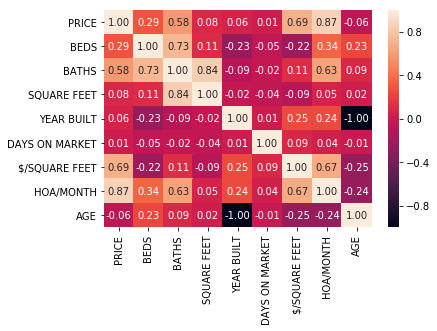

In [37]:
# Understanding correlations 
sns.heatmap(boston_real_estate_df_clean.corr(),annot=True,fmt=".2f");

### Q1. Which locations are hot markets in terms of high number of listings in Boston, MA area?

In [47]:
# Top 15 locations with respect highest number of listings 
boston_real_estate_df_numlist=boston_real_estate_df['LOCATION'].value_counts()[:15].reset_index()
boston_real_estate_df_numlist=boston_real_estate_df_numlist.rename(columns={'index':'LOCATION','LOCATION':'NUMBER OF LISTINGS'})
boston_real_estate_df_numlist

,LOCATION,NUMBER OF LISTINGS
0,Boston,42
1,South Boston,41
2,South End,40
3,Back Bay,20
4,Jamaica Plain,19
5,East Boston,19
6,Beacon Hill,18
7,Midtown,13
8,Dorchester,12
9,Charlestown,10


### Q2. Which are the most expensive neighborhoods in Boston, MA area?

In [48]:
# Identifying 10 most pricey neighborhoods in terms of $/sq feet price for purchasing homes in Boston
boston_top10_pricey2 = boston_real_estate_df_clean.groupby(['LOCATION'])['$/SQUARE FEET'].mean().reset_index().sort_values('$/SQUARE FEET',ascending=False)[:10]
boston_top10_pricey2['$/SQUARE FEET'] = (boston_top10_pricey2['$/SQUARE FEET']/1000).apply(lambda x:'${:,.2f}K'.format(x))
boston_top10_pricey2 = boston_top10_pricey2.rename(columns={'index':'LOCATION','$/SQUARE FEET':'AVERAGE $/SQUARE FEET IN GRANDS'})
boston_top10_pricey2

,LOCATION,AVERAGE $/SQUARE FEET IN GRANDS
40,Seaport District,$1.85K
46,Theatre District,$1.43K
47,Waterfront,$1.40K
3,Beacon Hill,$1.40K
2,Back Bay,$1.31K
27,Harvard Square,$1.29K
34,Midtown,$1.13K
45,The Fenway,$1.09K
44,South End,$1.06K
36,North End,$0.91K


In [139]:
# Identifying 10 most pricey locations for purchasing homes in Boston
boston_top10_pricey = boston_real_estate_df_clean.groupby(['LOCATION'])['PRICE'].mean().reset_index().sort_values('PRICE',ascending=False)[:15]
boston_top10_pricey['PRICE'] = (boston_top10_pricey['PRICE']/1000000).apply(lambda x:'${:,.2f}MM'.format(x))
boston_top10_pricey = boston_top10_pricey.rename(columns={'LOCATION':'LOCATION','PRICE':'AVERAGE PRICE IN ($) MILLIONS'})
boston_top10_pricey

,LOCATION,AVERAGE PRICE IN ($) MILLIONS
3,Beacon Hill,$3.52MM
34,Midtown,$2.80MM
27,Harvard Square,$2.48MM
40,Seaport District,$2.31MM
47,Waterfront,$2.13MM
46,Theatre District,$1.95MM
14,Coolidge Corner,$1.93MM
2,Back Bay,$1.88MM
43,South Boston's City Point,$1.85MM
0,Allston,$1.63MM
